<a href="https://colab.research.google.com/github/jocobtt/Python-projects/blob/master/Data_sci_mid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install seaborn 
!pip install sklearn
!pip install statsmodels

  Running setup.py bdist_wheel for sklearn ... - done
  Stored in directory: /root/.cache/pip/wheels/76/03/bb/589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
Successfully built sklearn


In [0]:
import os 
import pandas as pd
import numpy as np 
import seaborn as sns
%matplotlib inline


In [0]:
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [0]:
paths = 'http://bigdata.cs.byu.edu/Lectures/EEGEyeState.csv'
df = pd.read_table(paths,sep=',',encoding='latin1')

# Exploratory Data Analysis

In [0]:
df.head()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,0
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,0
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,0
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,0
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,0


In [0]:
df.shape

(14980, 15)

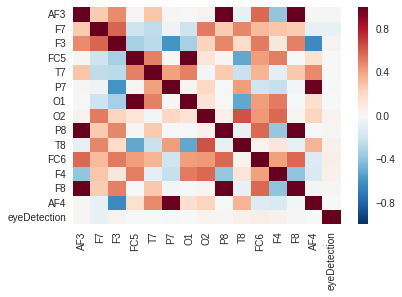

In [0]:
sns.heatmap(df.corr())

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14980 entries, 0 to 14979
Data columns (total 15 columns):
AF3             14980 non-null float64
F7              14980 non-null float64
F3              14980 non-null float64
FC5             14980 non-null float64
T7              14980 non-null float64
P7              14980 non-null float64
O1              14980 non-null float64
O2              14980 non-null float64
P8              14980 non-null float64
T8              14980 non-null float64
FC6             14980 non-null float64
F4              14980 non-null float64
F8              14980 non-null float64
AF4             14980 non-null float64
eyeDetection    14980 non-null int64
dtypes: float64(14), int64(1)
memory usage: 1.7 MB


In [0]:
df.describe()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
count,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000
mean,4321.917777,4009.767694,4264.022433,4164.946326,4341.741075,4644.022379,4110.400160,4616.056904,4218.826610,4231.316200,4202.456900,4279.232774,4615.205336,4416.435832,0.448798
std,2492.072174,45.941672,44.428052,5216.404632,34.738821,2924.789537,4600.926543,29.292603,2136.408523,38.050903,37.785981,41.544312,1208.369958,5891.285043,0.497388
min,1030.770000,2830.770000,1040.000000,2453.330000,2089.740000,2768.210000,2086.150000,4567.180000,1357.950000,1816.410000,3273.330000,2257.950000,86.666700,1366.150000,0.000000
25%,4280.510000,3990.770000,4250.260000,4108.210000,4331.790000,4611.790000,4057.950000,4604.620000,4190.770000,4220.510000,4190.260000,4267.690000,4590.770000,4342.050000,0.000000
50%,4294.360000,4005.640000,4262.560000,4120.510000,4338.970000,4617.950000,4070.260000,4613.330000,4199.490000,4229.230000,4200.510000,4276.920000,4603.080000,4354.870000,0.000000
75%,4311.790000,4023.080000,4270.770000,4132.310000,4347.180000,4626.670000,4083.590000,4624.100000,4209.230000,4239.490000,4211.280000,4287.180000,4617.440000,4372.820000,1.000000
max,309231.000000,7804.620000,6880.510000,642564.000000,6474.360000,362564.000000,567179.000000,7264.100000,265641.000000,6674.360000,6823.080000,7002.560000,152308.000000,715897.000000,1.000000


In [0]:
#find null values if any
df.isnull().values.any()

False

In [0]:
#for cleaning the data - change from index and remove outliers


In [0]:
#try logistic regression
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from patsy import dmatrices
from sklearn.linear_model import Lasso, LassoCV, LogisticRegression

In [0]:
X = list(df)[:-1]
y = ['eyeDetection']

In [0]:
#form = smf.glm(formula = , data=df,family=sm.families.Binomial()).fit()

In [0]:
#form.summary()

In [0]:
#100*(np.exp(form.params)-1)

In [0]:
#100*(np.exp(form.conf_int())-1)

In [0]:
from sklearn.metrics import confusion_matrix

In [0]:
y, X = dmatrices('eyeDetection~AF3+F7+F3+FC5+T7+P7+O1+O2+P8+T8+FC6+F4+F8+AF4',df,return_type='dataframe')

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.1,random_state=40)

In [0]:
reg = LogisticRegression(fit_intercept=False,C=1e9)

In [0]:
valz = reg.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
valz.coef_

array([[ 4.08667807e-06,  5.43519915e-03, -1.99941158e-02,
         1.39705603e-02, -1.04640252e-02,  3.87988099e-02,
        -4.11804486e-02,  3.33203453e-03,  3.04659202e-04,
         5.06474605e-03,  4.71427366e-03, -1.06102713e-02,
         7.04084964e-03, -1.25584342e-03,  5.95526068e-03]])

In [0]:
preds = valz.predict(X_test)

In [0]:
print(confusion_matrix(y_test,preds))

[[602 206]
 [365 325]]


In [0]:
# ROC Curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, preds) # AUC is 60%


0.608031998852059

In [0]:
# Precision/Accuracy

In [0]:
#try k neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS 

In [0]:
kn_mod = KNeighborsClassifier(n_neighbors=3)

In [0]:
e = EFS(kn_mod,min_features=1,max_features=7,print_progress=True,scoring='accuracy')

In [0]:
kn_mod.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [0]:
y_pred = kn_mod.predict(X_test)

In [0]:
score = accuracy_score(y_test,y_pred)
print(score)

0.9732977303070761


In [0]:
#use confusion matrix to measure accuracy
print(confusion_matrix(y_test,y_pred))

[[788  20]
 [ 20 670]]


Try a Neural Network

In [0]:
# install pytorch 
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision
import torch

tcmalloc: large alloc 1073750016 bytes == 0x591ec000 @  0x7f04758b62a4 0x594e17 0x626104 0x51190a 0x4f5277 0x510c78 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f6070 0x510c78 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f6070 0x4f3338 0x510fb0 0x5119bd 0x4f6070


In [0]:
#try decision tree
import sklearn

In [0]:
# Random forest
from sklearn.ensemble import RandomForestClassifier

testnums = [0, 1, 2]

params = [
    [100, 50],
    [100, 30],
    [100, 10]
]

for test in testnums:
  random_forest = RandomForestClassifier(n_estimators=params[test][0], max_depth=params[test][1],
                             random_state=7, oob_score=True)
  random_forest.fit(X_train, np.ravel(y_train))

  print("Accuracy:")
  print(random_forest.score(X_test, y_test))

  print("Importances:")
  print(sorted(zip(random_forest.feature_importances_, X_test.columns), reverse=True))
  
  print("RMSE")
  print(random_forest.oob_score_)
  
  print("Confusion Matrix")
  print(confusion_matrix(y_test, random_forest.predict(X_test)))

Accuracy:
0.9272363150867824
Importances:
[(0.1170600626784643, 'O1'), (0.10814145128259871, 'P7'), (0.092443209502369, 'F7'), (0.08030782832310407, 'F8'), (0.07898314309419506, 'AF4'), (0.0746627697252027, 'AF3'), (0.06261460493107414, 'FC6'), (0.060380708496466075, 'FC5'), (0.05949791434597761, 'F4'), (0.057594617217353976, 'T8'), (0.056690371715982193, 'O2'), (0.05446009869773727, 'T7'), (0.05226001609283651, 'F3'), (0.04490320389663826, 'P8'), (0.0, 'Intercept')]
RMSE
0.9278296988577363
Confusion Matrix
[[768  40]
 [ 69 621]]
Accuracy:
0.9272363150867824
Importances:
[(0.11673063719434121, 'O1'), (0.10781292629444725, 'P7'), (0.092953829359334, 'F7'), (0.0802274525097564, 'F8'), (0.0792641522153035, 'AF4'), (0.07515241723103117, 'AF3'), (0.06294613083356568, 'FC6'), (0.06016117191215465, 'FC5'), (0.059546925735591956, 'F4'), (0.05720809330741596, 'T8'), (0.0563738970599088, 'O2'), (0.05456805173068826, 'T7'), (0.052004329076564354, 'F3'), (0.04504998553989672, 'P8'), (0.0, 'Interce

In [0]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()
param = {'n_estimators': [100, 150, 250],
        'max_depth': [10, 30, 50]}

gs = GridSearchCV(rf, param, cv=5, n_jobs=-1)
gs_fit = gs.fit(X_train, np.ravel(y_train))
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_depth,param_n_estimators,params,rank_test_score,split0_test_score,split0_train_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
5,8.123521,0.181109,0.928052,1.000000,30,250,"{'max_depth': 30, 'n_estimators': 250}",1,0.922877,1.000000,...,0.932147,1.000000,0.926558,1.000000,0.922820,1.000000,0.087913,0.005789,0.005178,0.000000
4,4.816458,0.109718,0.927459,1.000000,30,150,"{'max_depth': 30, 'n_estimators': 150}",2,0.923248,1.000000,...,0.931776,1.000000,0.926929,1.000000,0.921336,1.000000,0.032409,0.004765,0.004836,0.000000
8,7.480634,0.165321,0.927385,1.000000,50,250,"{'max_depth': 50, 'n_estimators': 250}",3,0.921394,1.000000,...,0.928439,1.000000,0.928412,1.000000,0.924304,1.000000,0.426685,0.014805,0.004390,0.000000
7,4.686501,0.106219,0.926420,1.000000,50,150,"{'max_depth': 50, 'n_estimators': 150}",4,0.919540,1.000000,...,0.929551,1.000000,0.922107,1.000000,0.925046,1.000000,0.073778,0.001576,0.005774,0.000000
6,3.044418,0.069139,0.926198,1.000000,50,100,"{'max_depth': 50, 'n_estimators': 100}",5,0.920653,1.000000,...,0.928439,1.000000,0.922849,1.000000,0.921707,1.000000,0.040434,0.001264,0.006185,0.000000
3,3.315177,0.073571,0.925901,1.000000,30,100,"{'max_depth': 30, 'n_estimators': 100}",6,0.922877,1.000000,...,0.929922,1.000000,0.922107,1.000000,0.917625,1.000000,0.028792,0.000369,0.006792,0.000000
2,5.780293,0.135246,0.860036,0.914200,10,250,"{'max_depth': 10, 'n_estimators': 250}",7,0.852799,0.914511,...,0.856878,0.915809,0.862760,0.914982,0.863822,0.911931,0.031094,0.004681,0.004454,0.001314
1,3.456222,0.080579,0.859665,0.914293,10,150,"{'max_depth': 10, 'n_estimators': 150}",8,0.853170,0.912007,...,0.856136,0.915067,0.862018,0.916002,0.864193,0.915361,0.029388,0.004739,0.004256,0.001516
0,2.290404,0.054912,0.859591,0.912253,10,100,"{'max_depth': 10, 'n_estimators': 100}",9,0.851687,0.911451,...,0.857990,0.913398,0.863131,0.913221,0.864193,0.913136,0.011324,0.001282,0.004486,0.001302


In [0]:
# XGBoost

from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, np.ravel(y_train))

print(xgb.score(X_test, y_test))

print(sorted(zip(xgb.feature_importances_, X_test.columns), reverse=True))

print(confusion_matrix(y_test, xgb.predict(X_test)))

0.7997329773030708
[(0.15499255, 'P7'), (0.13710879, 'F7'), (0.13561848, 'O1'), (0.10581222, 'F8'), (0.08345753, 'AF4'), (0.07600596, 'AF3'), (0.05514158, 'T7'), (0.047690015, 'O2'), (0.0461997, 'FC6'), (0.04023845, 'F4'), (0.038748138, 'T8'), (0.037257824, 'FC5'), (0.02980626, 'F3'), (0.011922504, 'P8'), (0.0, 'Intercept')]
[[696 112]
 [188 502]]


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [0]:
param = {'n_estimators': [100, 150, 250],
        'max_depth': [10, 30, 50]}

gs = GridSearchCV(xgb, param, cv=5, n_jobs=-1)
gs_fit = gs.fit(X_train, np.ravel(y_train))
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_depth,param_n_estimators,params,rank_test_score,split0_test_score,split0_train_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
2,7.591767,0.126733,0.944815,1.000000,10,250,"{'max_depth': 10, 'n_estimators': 250}",1,0.942529,1.000000,...,0.949203,1.000000,0.943991,1.000000,0.941373,1.000000,0.209957,0.003189,0.002887,0.000000
5,13.362057,0.167957,0.943925,1.000000,30,250,"{'max_depth': 30, 'n_estimators': 250}",2,0.941416,1.000000,...,0.944753,1.000000,0.941395,1.000000,0.938404,1.000000,0.112068,0.006292,0.005263,0.000000
8,13.305743,0.165931,0.942738,1.000000,50,250,"{'max_depth': 50, 'n_estimators': 250}",3,0.935855,1.000000,...,0.944753,1.000000,0.939540,1.000000,0.939518,1.000000,0.912676,0.009255,0.006315,0.000000
4,9.148021,0.118532,0.939772,1.000000,30,150,"{'max_depth': 30, 'n_estimators': 150}",4,0.933259,1.000000,...,0.942158,1.000000,0.937685,1.000000,0.935065,1.000000,0.098049,0.002739,0.006225,0.000000
1,4.713809,0.080302,0.939475,0.999722,10,150,"{'max_depth': 10, 'n_estimators': 150}",5,0.937338,0.999629,...,0.943270,0.999907,0.935460,0.999444,0.935065,0.999629,0.109318,0.000892,0.004478,0.000203
7,9.435577,0.117798,0.939401,1.000000,50,150,"{'max_depth': 50, 'n_estimators': 150}",6,0.932518,1.000000,...,0.942158,1.000000,0.935831,1.000000,0.936920,1.000000,0.104049,0.007026,0.005956,0.000000
6,6.547863,0.084659,0.936805,1.000000,50,100,"{'max_depth': 50, 'n_estimators': 100}",7,0.930664,1.000000,...,0.940675,1.000000,0.934718,1.000000,0.932468,1.000000,0.054579,0.002759,0.005503,0.000000
3,6.560491,0.082360,0.936508,1.000000,30,100,"{'max_depth': 30, 'n_estimators': 100}",8,0.928439,1.000000,...,0.940675,1.000000,0.934718,1.000000,0.933581,1.000000,0.217439,0.000648,0.005805,0.000000
0,2.908514,0.061925,0.930722,0.997330,10,100,"{'max_depth': 10, 'n_estimators': 100}",9,0.926956,0.996384,...,0.934001,0.997867,0.928412,0.997589,0.928386,0.997126,0.378801,0.005884,0.003524,0.000532


In [0]:
# XGBoost after tuning

xgb = XGBClassifier(n_estimators=250, max_depth=15,
                             random_state=7)
xgb.fit(X_train, np.ravel(y_train))

print("Train score:")
print(xgb.score(X_train, y_train))

print("Test score:")
print(xgb.score(X_test, y_test))

print("Importances:")
print(sorted(zip(xgb.feature_importances_, X_test.columns), reverse=True))

print("Confusion Matrix:")
print(confusion_matrix(y_test, xgb.predict(X_test)))

Train score:


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


1.0
Test score:
0.951935914552737
Importances:
[(0.095110536, 'O1'), (0.094059035, 'F7'), (0.0915805, 'F8'), (0.08241744, 'FC6'), (0.07523221, 'AF4'), (0.0691235, 'O2'), (0.068572715, 'AF3'), (0.06809704, 'T7'), (0.06654482, 'FC5'), (0.06374083, 'T8'), (0.063365296, 'F3'), (0.059710085, 'F4'), (0.055704378, 'P7'), (0.04674161, 'P8'), (0.0, 'Intercept')]
Confusion Matrix:
[[774  34]
 [ 38 652]]


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
